In [35]:
import numpy as np 
import pandas as pd 
import os
# import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# example of loading the inception v3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
# load model
MyCnn = InceptionV3()
# summarize the model


In [36]:
batch_size = 40
img_height = 200
img_width = 200


In [37]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 7555 files belonging to 2 classes.
Using 6044 files for training.


In [38]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 7555 files belonging to 2 classes.
Using 1511 files for validation.


In [39]:
class_names = training_ds.class_names

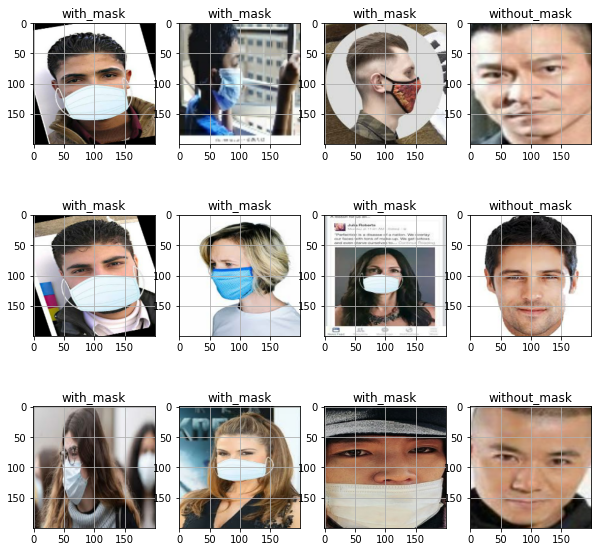

In [40]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [41]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [42]:
## lets define our CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  # Some thing I realised just
  # using flatten layer will 
  # increase the size of your
  # model, hence use
  # Global avg Pooling 
  # instead
  # layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation= 'softmax')
])

In [43]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
## lets train our CNN
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 15)
MyCnn.save('model.h5')

Epoch 1/15
152/152 [==============================] - 5s 32ms/step - loss: 0.2194 - accuracy: 0.9186 - val_loss: 0.1953 - val_accuracy: 0.9292
Epoch 2/15
152/152 [==============================] - 5s 32ms/step - loss: 0.2049 - accuracy: 0.9250 - val_loss: 0.1963 - val_accuracy: 0.9246
Epoch 3/15
152/152 [==============================] - 5s 32ms/step - loss: 0.1968 - accuracy: 0.9287 - val_loss: 0.1910 - val_accuracy: 0.9285
Epoch 4/15
152/152 [==============================] - 5s 32ms/step - loss: 0.1863 - accuracy: 0.9315 - val_loss: 0.1793 - val_accuracy: 0.9312
Epoch 5/15
152/152 [==============================] - 5s 33ms/step - loss: 0.1863 - accuracy: 0.9322 - val_loss: 0.1606 - val_accuracy: 0.9431
Epoch 6/15
152/152 [==============================] - 5s 33ms/step - loss: 0.1758 - accuracy: 0.9386 - val_loss: 0.1584 - val_accuracy: 0.9411
Epoch 7/15
152/152 [==============================] - 5s 33ms/step - loss: 0.1680 - accuracy: 0.9401 - val_loss: 0.1549 - val_accuracy: 0.9418

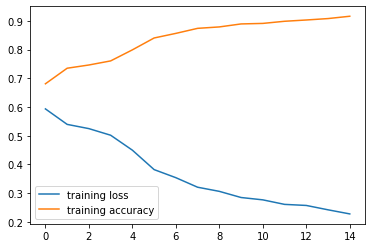

In [45]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

[[7.1995860e-01 2.8004140e-01]
 [4.6695647e-01 5.3304356e-01]
 [1.1632456e-01 8.8367546e-01]
 [9.9896657e-01 1.0334798e-03]
 [8.8406994e-04 9.9911588e-01]
 [9.6368819e-01 3.6311783e-02]
 [4.5475638e-03 9.9545246e-01]
 [1.1686741e-04 9.9988317e-01]
 [1.5629983e-01 8.4370017e-01]
 [9.8838848e-01 1.1611539e-02]
 [4.2975801e-03 9.9570245e-01]
 [2.1958684e-05 9.9997807e-01]
 [7.1178013e-01 2.8821990e-01]
 [4.9760783e-05 9.9995029e-01]
 [3.3833266e-03 9.9661666e-01]
 [5.0686455e-01 4.9313545e-01]
 [9.8376632e-01 1.6233670e-02]
 [4.0220717e-04 9.9959785e-01]
 [9.9957150e-01 4.2854616e-04]
 [2.9491924e-03 9.9705076e-01]
 [9.8695648e-01 1.3043565e-02]
 [9.9019265e-01 9.8073436e-03]
 [9.9990702e-01 9.2982293e-05]
 [9.9791843e-01 2.0816133e-03]
 [9.9266315e-01 7.3368540e-03]
 [3.3702672e-02 9.6629733e-01]
 [5.4491176e-03 9.9455088e-01]
 [9.9996758e-01 3.2383825e-05]
 [6.5994092e-05 9.9993396e-01]
 [6.1614439e-02 9.3838561e-01]
 [1.6351382e-03 9.9836487e-01]
 [1.0593539e-02 9.8940641e-01]
 [9.9811

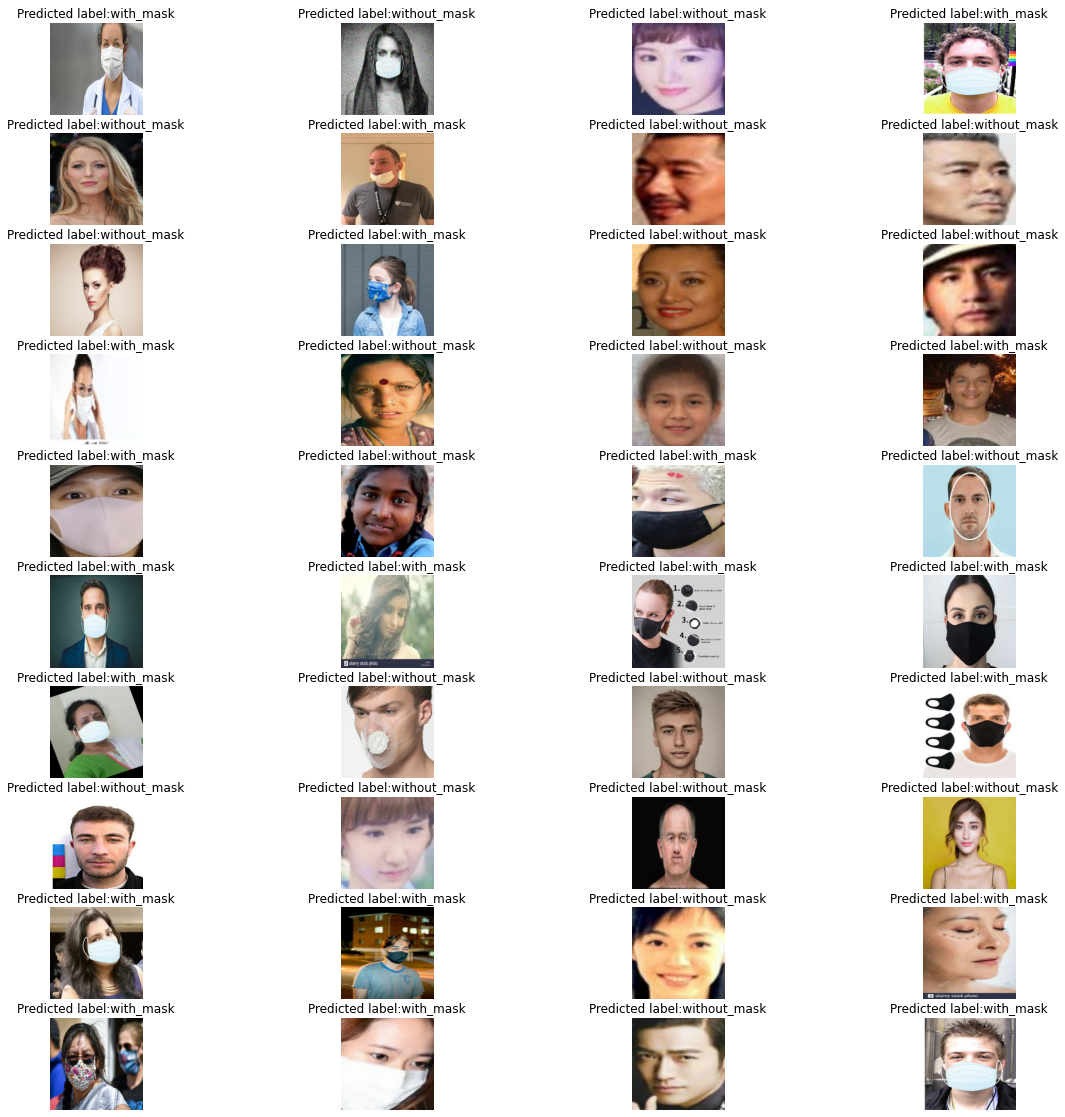

In [53]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    print(predictions)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)

Found 2 files belonging to 2 classes.


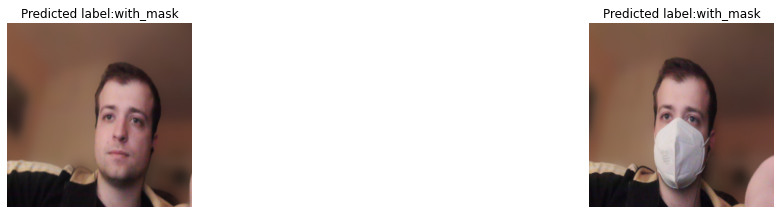

In [52]:
## loading testing data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './manotest',
)

plt.figure(figsize=(40, 40))
for images, labels in test_ds.take(1):
    predictions = MyCnn.predict(images)
    print(predictions)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(2):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)
    